# Predict bike rentals

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

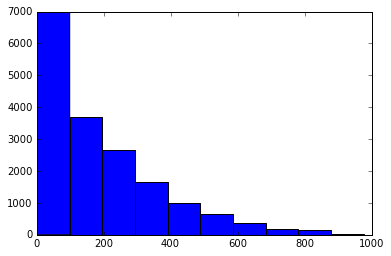

In [3]:
# Look at the distribution of total rentals
plt.hist(bike_rentals["cnt"])

In [4]:
bike_rentals.corr()["cnt"].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
# Write a function to classify hours into different time period. Ie, morning, afternoon, evening, and night.
def assign_label(value):
    if value in range(6,13):
        return 1
    if value in range(12,19):
        return 2
    if value in range(18,25):
        return 3
    else:
        return 4

In [6]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Choose success metric
Choose mse to be the accuracy metric because mse works on continuous numeric data

In [8]:
train = bike_rentals.sample(frac=0.8)
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
14959,14960,2012-09-20,3,1,9,12,0,4,1,1,0.62,0.6212,0.43,0.1343,57,233,290,1
14564,14565,2012-09-04,3,1,9,1,0,2,1,1,0.68,0.6364,0.82,0.1343,15,9,24,4
12217,12218,2012-05-29,2,1,5,6,0,2,1,1,0.66,0.6061,0.78,0.2239,9,145,154,1
14124,14125,2012-08-16,3,1,8,17,0,4,1,1,0.82,0.7273,0.34,0.1940,130,767,897,2
9228,9229,2012-01-25,1,1,1,10,0,3,1,2,0.26,0.2273,0.70,0.3284,30,111,141,1


In [13]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
10,11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36,1
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36,3


## Linear regression model

In [22]:
# Create a list of predictor columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("instant")
predictors.remove("dteday")
predictors.remove("casual")
predictors.remove("registered")

lr = LinearRegression()
lr.fit(train[predictors], train["cnt"])
predictions = lr.predict(test[predictors])

mse = mean_squared_error(test["cnt"], predictions)
print(mse)
print(math.sqrt(mse))

17620.096131413262
132.74071015108086


The error is very high. Let's try other models.

## Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train[predictors], train["cnt"])
predictions = dtr.predict(test[predictors])
mse = mean_squared_error(test["cnt"], predictions)
print(mse)
print(math.sqrt(mse))

3381.089902186421
58.14714010324516


In [42]:
# Tweak the parameters
dtr = DecisionTreeRegressor(min_samples_leaf = 3, max_depth = 14)
dtr.fit(train[predictors], train["cnt"])
predictions = dtr.predict(test[predictors])
mse = mean_squared_error(test["cnt"], predictions)
print(mse)
print(math.sqrt(mse))

2655.0067486580183
51.526757598921535


## Decision tree error
The error of decision tree regressor is much lower than the liner regression model.

## Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[predictors], train["cnt"])
predictions = rf.predict(test[predictors])
mse = mean_squared_error(test["cnt"], predictions)
print(mse)
print(math.sqrt(mse))

2046.2078385124985
45.235028888158105


In [80]:
# Tweak the parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf = 3, min_samples_split = 5, max_depth = 27)
rf.fit(train[predictors], train["cnt"])
predictions = rf.predict(test[predictors])
mse = mean_squared_error(test["cnt"], predictions)
print(mse)
print(math.sqrt(mse))

1872.515425234945
43.2725712806039


Random foreset is by far the most accurate model out of three.